# Assignment 1 part 3


In [92]:
# For this part  I am getting data from https://data.gov.ie/dataset/dublin-economic-monitor, from Dublin Region Economic 
# Indicators to monitor economic development in the Dublin City Region

In [93]:
# Firs of all I upload the file in a data frame:

Unemployment <- read.table('indicator-1-unemployment.csv', sep=",", header = TRUE, fill = T, na.strings = c("NA"))

In [94]:
# This dataset is given information on unemployment in Ireland from 1998 to the second quarter of 2020. The main variables
# that will be useful for the inspection are the unemployment rate in Ireland, the Dublin unemployment rate, 
# the number of unemployed people in Dublin and the number of employees IN Dublin as well. I do not consider the rest of
# the columns relevant for the analysis.


# Lets check it:
head(Unemployment, 3)

,Quarter,National.Unemployment.Rate.SA....,Dublin.Unemployed.SA..000.,Dublin.Unemployment.Rate.SA....,Dublin.Employed.SA..000.,QoQ.Dublin.Employed,YoY..Dublin.Employed,X.YoY.Dublin.Unemployed
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Q1 98,9.0%,43.4,8.1%,496.6,NA,NA,
2,Q2 98,8.0%,39.5,7.2%,499.4,NA,NA,
3,Q3 98,7.4%,37.4,7.0%,507.8,NA,NA,


In [95]:
# Here I change the columns names in order to work easier with the dataframe:

names(Unemployment)[names(Unemployment) == 'National.Unemployment.Rate.SA....'] <- 'National_rate'
names(Unemployment)[names(Unemployment) == 'Dublin.Unemployed.SA..000.'] <- 'Dublin_unemployed'
names(Unemployment)[names(Unemployment) == 'Dublin.Unemployment.Rate.SA....'] <- 'Dublin__rate'
names(Unemployment)[names(Unemployment) == 'Dublin.Employed.SA..000.'] <- 'Dublin__employed'

In [96]:
# Lets check it:

head(Unemployment, 3)

,Quarter,National_rate,Dublin_unemployed,Dublin__rate,Dublin__employed,QoQ.Dublin.Employed,YoY..Dublin.Employed,X.YoY.Dublin.Unemployed
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Q1 98,9.0%,43.4,8.1%,496.6,NA,NA,
2,Q2 98,8.0%,39.5,7.2%,499.4,NA,NA,
3,Q3 98,7.4%,37.4,7.0%,507.8,NA,NA,


In [97]:
# Lets cary out the basic checks:
# I call the readr package to do it:

library(readr)

problems(Unemployment)
nrow(Unemployment)
ncol(Unemployment)
tail(Unemployment)

row,col,expected,actual
<int>,<int>,<chr>,<chr>


[1] 170

[1] 8

,Quarter,National_rate,Dublin_unemployed,Dublin__rate,Dublin__employed,QoQ.Dublin.Employed,YoY..Dublin.Employed,X.YoY.Dublin.Unemployed
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
165,,,NA,,NA,NA,NA,
166,,,NA,,NA,NA,NA,
167,,,NA,,NA,NA,NA,
168,,,NA,,NA,NA,NA,
169,,,NA,,NA,NA,NA,
170,,,NA,,NA,NA,NA,


In [98]:
# Lets chak for the missing values na:

missing <- is.na(Unemployment)

In [99]:
# Here count by columns:

count <- colSums(missing)

In [100]:
# Hee lets figure out whats columns have some of them:

count[count>0]

Dublin_unemployed     Dublin__employed  QoQ.Dublin.Employed 
                  80                   80                   86 
YoY..Dublin.Employed 
                  86

In [101]:
# Here I am going to calculate the avrage Number of people unemployed in Dublin, and  the Dublin avarage Number of 
# people employed in Dublin, getting the corresponding columns:

# Here I add the argument na.rm = TRUE to exclude from the calculation the cases given as lost:

Avg_Dunlin_Unemployed <- mean(Unemployment$Dublin_unemployed, na.rm=TRUE)

# Same in here for Employed:

Avg_Dunlin_Employed <- mean(Unemployment$Dublin__employed, na.rm=TRUE)

# Let´s check it. Using "round" to aproximate the figure:

print(paste0("The average number of unemployed people in Dublin per year from the first quarter of 1998 to the second 
quarter of 2020 is ", round(Avg_Dunlin_Unemployed),".000 people"))
print(paste0("And The average number of employed people in Dublin per year for the same
period is ", round(Avg_Dunlin_Employed),".000 people"))

[1] "The average number of unemployed people in Dublin per year from the first quarter of 1998 to the second \nquarter of 2020 is 45.000 people"
[1] "And The average number of employed people in Dublin per year for the same\nperiod is 598.000 people"


In [102]:
# Now, I am going to calculate the average unemployment rate in Ireland and In Dublin:

# First I calculate the Ireland rate, gettin the coresponding column:

National_rate <- Unemployment$National_rate

# Using the as.numeric sunticon to convert it in order to be able to operate with them:

National_rate_num <- as.numeric(gsub("%", "", National_rate))# Using gsub to remove the characters 

# Now I calculate the average:

Avg_National_rate <- mean(National_rate_num, na.rm=TRUE)

# Secondly, the Dublin rate with the same process:

Dublin_rate <- Unemployment$Dublin__rate
Dublin_rate_num <- as.numeric(gsub("%", "", Dublin_rate))
Avg_Dublin_rate <- mean(Dublin_rate_num, na.rm=TRUE)


# Lets check it:

print(paste0("The average rate of unemployed people in Ireland from the first quarter of 1998 to the second quarter n/
of 2020 is ",round(Avg_National_rate),"%. "))
print(paste0("The average rate of unemployed people in Dublin for the same period is ",round(Avg_Dublin_rate),"%. "))

[1] "The average rate of unemployed people in Ireland from the first quarter of 1998 to the second quarter n/\nof 2020 is 8%. "
[1] "The average rate of unemployed people in Dublin for the same period is 7%. "


In [103]:
# Here I am alculating the max, min and range of the rate of unemployment in Ireland (1998-2020):

# Here I calculate max and min:

max_range_National_rate <- max(National_rate_num,na.rm=TRUE)
min_range_National_rate <- min(National_rate_num,na.rm=TRUE)

# Here I calculate the range:

range_National_rate <- max_range_National_rate - min_range_National_rate

# Here I calculate the standard deviation:

Std_National_rate <- sd(National_rate_num,na.rm=TRUE)

# Let´s check the result:

print(paste0("The max unemployment rate in Ireland from 1998 to 2020 was ",max_range_National_rate,"% and the min n/
rate was ",min_range_National_rate,"%, the range was ",range_National_rate,"%, and according to the mean for this n/
national unemployment rate of ",round(Avg_National_rate),"% the standard deviation is the ",round(Std_National_rate),"%."))

[1] "The max unemployment rate in Ireland from 1998 to 2020 was 16% and the min n/\nrate was 4%, the range was 12%, and according to the mean for this n/\nnational unemployment rate of 8% the standard deviation is the 4%."


In [104]:
# Here I calculate the quarters corresponding to max and min unemployment rate in Ireland:

max_quarter <- Unemployment$Quarter[Unemployment$National_rate == "16.0%"]
min_quarter <- Unemployment$Quarter[Unemployment$National_rate == "4.0%"]

# Lets check:

print(paste0("The max uemployment rate in Ireland of 16% corresponds to ",max_quarter," what means the first quarter of 2012"))
print(paste0("The min uemployment rate in Ireland of 8% corresponds to ",max_quarter," what means the second quarter of 1998"))

[1] "The max uemployment rate in Ireland of 16% corresponds to Q1 12 what means the first quarter of 2012"
[1] "The min uemployment rate in Ireland of 8% corresponds to Q1 12 what means the second quarter of 1998"


In [105]:
#Here I calculate the most repeated unemployment rate in Ieland and in Dublinfrom 1998-2020

# Hee I use "na.omit" to omit the nas values:

National_rate_nona <- na.omit(National_rate_num)
Dublin_rate_nona <- na.omit(Dublin_rate_num)

# Using this function to calculate the most commun value, what statistically is the mode:

getmode <- function(v)
{
uniqv <- unique(v) 
uniqv [ which.max(tabulate( match (v, uniqv )))]
}

# applying the function:

Ireland_popular_rate <- getmode(National_rate_nona)
Dublin_popular_rate <- getmode(Dublin_rate_nona)

# # Lets check:

print(paste0("The most popular unemployment rate in Ieland from 1998-2020 is ",Ireland_popular_rate,"%, and in  Dublin is ",Dublin_popular_rate,"%."))

[1] "The most popular unemployment rate in Ieland from 1998-2020 is 4.7%, and in  Dublin is 4.8%."


In [106]:
# Now, I would like to show the unemployment rate during the last 20 years in Ireland and Dublin per year.

# First step: I clean the variable "Quarter", I convert to factor and I remove all elements that dont allow me to group by
# this variable. I have remove them element by element as it is the only way I have been able to do it.

new_Quarter <- as.factor(gsub("Q1","",Unemployment$Quarter))
new_Quarter2 <- as.factor(gsub("Q2","",new_Quarter))
new_Quarter3 <- as.factor(gsub("Q3","",new_Quarter2))
New_quarter <- as.factor(gsub("Q4","",new_Quarter3))

# Lets check the result:

New_quarter

[1]  98  98  98  98  99  99  99  99  00  00  00  00  01  01  01  01  02  02
 [19]  02  02  03  03  03  03  04  04  04  04  05  05  05  05  06  06  06  06
 [37]  07  07  07  07  08  08  08  08  09  09  09  09  10  10  10  10  11  11
 [55]  11  11  12  12  12  12  13  13  13  13  14  14  14  14  15  15  15  15
 [73]  16  16  16  16  17  17  17  17  18  18  18  18  19  19  19  19  20  20
 [91]                                                                        
[109]                                                                        
[127]                                                                        
[145]                                                                        
[163]                                
24 Levels:   00  01  02  03  04  05  06  07  08  09  10  11  12  13  14 ...  99

In [107]:
# Here I create a new dataframe calles "new_data" with the new variables just created:

new_data <- data.frame(New_quarter, National_rate_num) 

#Les`t check it:
head(new_data, 3)

,New_quarter,National_rate_num
,<fct>,<dbl>
1,98,9.0
2,98,8.0
3,98,7.4


In [108]:
# Now I call the dplyr package to kepp manipulating data and use function group_by

library(dplyr)

In [109]:
# Here I use the fuction group_by to group by year and I calculate the mean of al quarters of each year, and I do it in a new 
# variable called "new_data2"

new_data2 <- group_by(new_data, New_quarter)

#then I use the fuctions mean and round to alculate these  means and round them , putting all in the variable "asis"
# and Using the fuction summarise:

asis <- summarise(new_data2, nacional = round(mean(National_rate_num)))

`summarise()` ungrouping output (override with `.groups` argument)



In [110]:
#Here omitting the nas:

asis_nona <- na.omit(asis)

# Hee geting just from 2000 to 2020:

nueva_tabla <- asis_nona[1:21,]

# Lets check it: 

head(nueva_tabla,2)

New_quarter,nacional
<fct>,<dbl>
00,4
01,4


In [111]:
#Here calling the ggplot2 package to visualiza the data:

library(ggplot2)

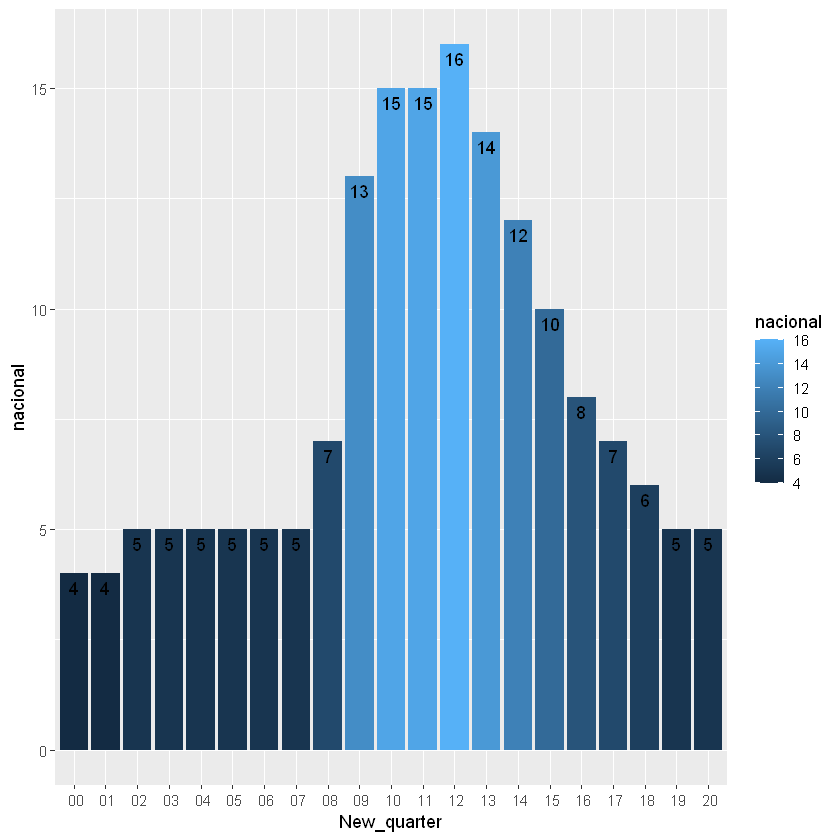

In [112]:

#Here creating the the bar plot of unemployment rate in Ireland from 2000 to 2020

National_rate_bar <- ggplot(nueva_tabla, aes(x=New_quarter, y=nacional, fill=nacional))+ geom_bar(stat = "identity") +
geom_text(aes(label=nacional), vjust=1.5, colour="black") # adding the number on the top of each bar

# Let´s see the result:

National_rate_bar

`summarise()` ungrouping output (override with `.groups` argument)



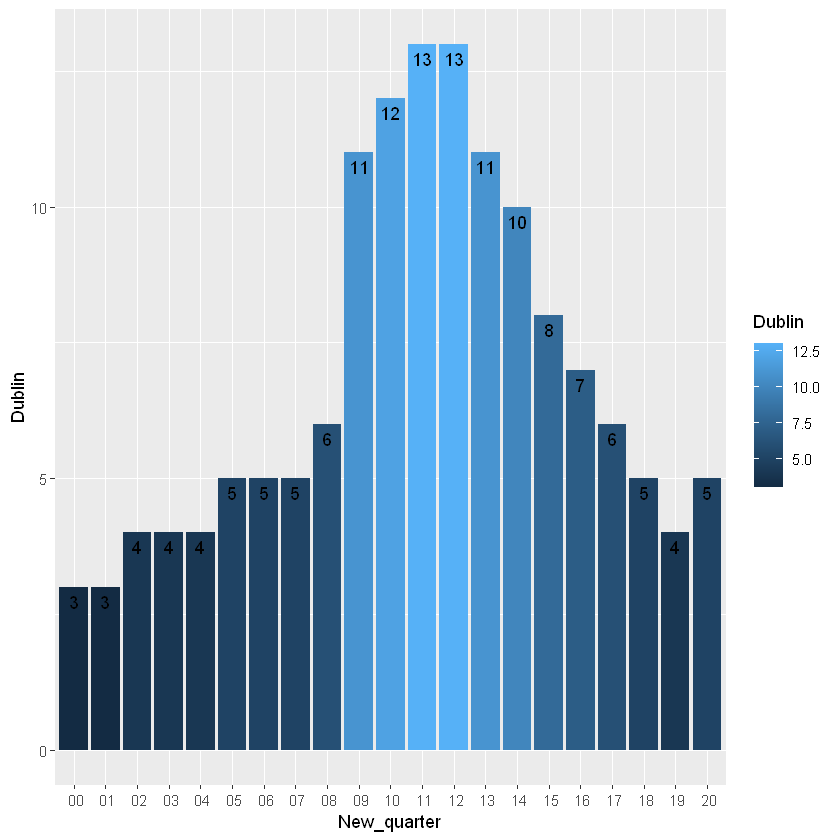

In [113]:

# Now I am going to do the same poccess with the Dublin`s nemployment rate from the same perios (2000-2020) 

new_Dublin <- data.frame(New_quarter, Dublin_rate_num) 


new_Dublin2 <- group_by(new_Dublin, New_quarter)
new_Dublin3 <- summarise(new_Dublin2, Dublin = round(mean(Dublin_rate_num)))

# omitting nas and picking from 2000-2020
new_Dublin3_nona <- na.omit(new_Dublin3)
nueva_tabla2 <- new_Dublin3_nona[1:21,]

# Creating the plot:

Dublin_rate_bar <- ggplot(nueva_tabla2, aes(x=New_quarter, y=Dublin, fill=Dublin))+ geom_bar(stat = "identity") +
geom_text(aes(label=Dublin), vjust=1.5, colour="black")

# Let´s see the result:

Dublin_rate_bar

In [114]:
# Now for instance, let´s visualize the "Economically Active Population" in Dublin in the las 20 years. 
# Thr Economically Active Population is the sum of the unemplyed and employed population.
# So, the first step is calculate that figures:

Active <- Unemployment$Dublin_unemployed + Unemployment$Dublin__employed

# Now, ceate a new datafame (using the variable New_quarter I created befoe):

Active_Population <- data.frame(New_quarter, Active)

# Omitting nas:

Active_Population_nona <- na.omit(Active_Population)

# Let´s check:

head(Active_Population_nona,3)

,New_quarter,Active
,<fct>,<dbl>
1,98,540.0
2,98,538.9
3,98,545.2


In [115]:
# Now I group by year:

Active_Population_nona_group <- group_by(Active_Population_nona, New_quarter)

#then calculate these  means and round them , putting all in the variable "Active_Population_final"
# and Using the fuction summarise:

Active_Population_final <- summarise(Active_Population_nona_group, number_of_people = round(mean(Active)))

`summarise()` ungrouping output (override with `.groups` argument)



In [116]:
# Changing th column name:

names(Active_Population_final)[names(Active_Population_final) == 'New_quarter'] <- 'Year'

# Checking:

head(Active_Population_final,2)

Year,number_of_people
<fct>,<dbl>
00,574
01,584


In [117]:
# Now, eleting the years from 2000 to 2020:

Dublin_Active_Population <- Active_Population_final[1:21,]

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



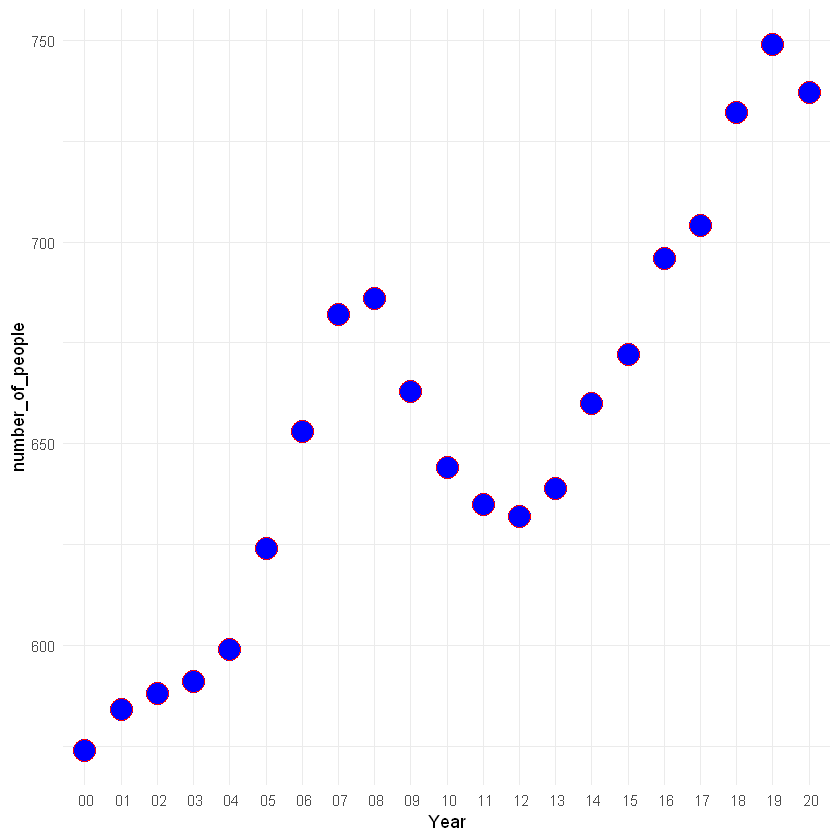

In [118]:
# Creating the graph to visualize the number of Economically Active Population" in Dublin in the las 20 years:

ggplot(Dublin_Active_Population, aes(Year, number_of_people)) + geom_line(colour="red")  + 
  geom_point( size=6, shape=21, fill="blue", colour="red") + # I pick shape 21 to have circles and fill them
  theme_minimal()

In [119]:
# The result above reflects an increasing number of active population from 2000 until the financial crisis(2007), then a drop
# of this active population duting for 4 years (2008-2012)and a sustained growth again until this year. The numbers 

In [120]:
Active_adjust <- Active_Population_nona[9:90,]

names(Active_adjust)[names(Active_adjust) == 'New_quarter'] <- 'Year'
names(Active_adjust)[names(Active_adjust) == 'Active'] <- 'number_of_people'

head(Active_adjust,3)

,Year,number_of_people
,<fct>,<dbl>
9,00,565.7
10,00,572.3
11,00,580.2


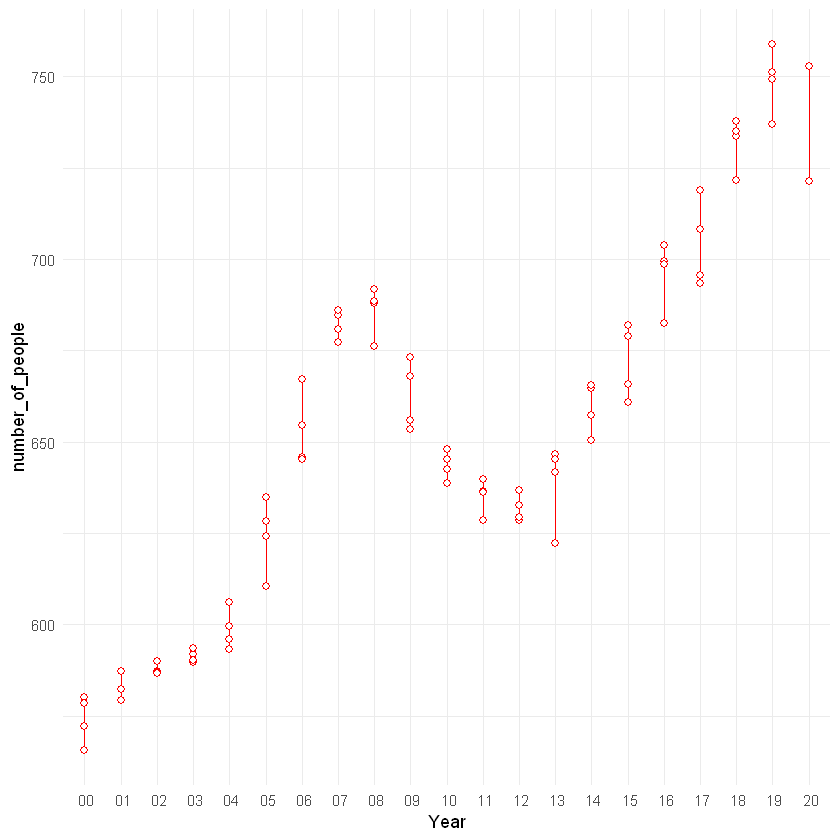

In [121]:
ggplot(Active_adjust, aes(Year, number_of_people)) + geom_line(colour="red")  + 
  geom_point( size=2, shape=21, fill="white", colour="red") + 
  theme_minimal()